## 2. 모수 구간추정 및 가설검정 (confidence interval and hypothesis test)

데이터의 수: 167954
키 평균: 174.69018898031607 , 표준편차: 5.448833013622449


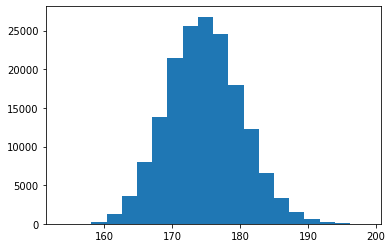

몸무게 평균: 72.16640407492528 , 표준편차: 13.713571398740728


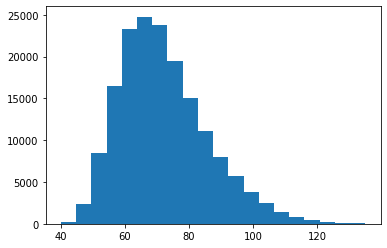

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# (1) 데이터 읽어오기 및 원하는 데이터 열 단위로 추출하기, 시각화
# 육군 신체측정 정보 (https://www.data.go.kr/data/15083227/fileData.do)

data = np.genfromtxt('/content/army_phexam_data.csv', delimiter=",",encoding='cp949')
print('데이터의 수:', len(data)-1)
height = np.genfromtxt('/content/army_phexam_data.csv',delimiter=",",  usecols= (4),encoding='cp949')
height = height[1:]

weight = np.genfromtxt('/content/army_phexam_data.csv', delimiter=",",  usecols= (9),encoding='cp949')
weight = weight[1:]

print('키 평균:', height.mean(), ', 표준편차:', height.std())
plt.hist(height,20)
plt.show()

print('몸무게 평균:', weight.mean(), ', 표준편차:', weight.std())
plt.hist(weight,20)
plt.show()

In [ ]:
# (2) 데이터에서 마지막 10000명을 선택하여 구간추정을 수행 후 분석

## TODO ##
height = np.genfromtxt('/content/army_phexam_data.csv',delimiter=",",  usecols= (4),encoding='cp949')
weight = np.genfromtxt('/content/army_phexam_data.csv', delimiter=",",  usecols= (9),encoding='cp949')
height = height[-10000:]
weight = weight[-10000:]
print(stats.norm.interval(0.99, loc=height.mean(), scale= np.std(height) / np.sqrt(10000)))
print(stats.norm.interval(0.99, loc=weight.mean(), scale= np.std(weight) / np.sqrt(10000)))
# 전체 데이터에서 구한 평균치가 추정한 구간안에 들어가는가? 들어가지 않는다면 그 이유를 분석하면?
# 몸무게는 들어가지 않는다. 왜냐하면 표본평균과 모평균이 정확히 일치하지 않으므로, 점추정값은 오차를 갖기 때문이다.

(174.65694931289897, 174.93671068710097)
(72.46033037883016, 73.16456962116983)


In [ ]:
# (3) 데이터에서 마지막 30명을 선택하여 구간추정 수행 후 분석
height = np.genfromtxt('/content/army_phexam_data.csv',delimiter=",",  usecols= (4),encoding='cp949')
height = height[-30:]
weight = np.genfromtxt('/content/army_phexam_data.csv', delimiter=",",  usecols= (9),encoding='cp949')
weight = weight[-30:]

print(stats.t.interval(0.99,29,loc=height.mean(), scale= np.std(height) / np.sqrt(30)))
print(stats.t.interval(0.99,29,loc=weight.mean(), scale= np.std(weight) / np.sqrt(30)))

(172.43130468918724, 176.6753619774795)
(66.65531966995066, 79.40468033004935)


In [ ]:
# (4) 데이터에서 2013년, 2016년에 측정된 체중값을 추출 후, 가설 검정 (H0:mu=mu_0, H1:mu>mu_0)
import pandas
csv_data = pandas.read_csv('/content/army_phexam_data.csv', usecols=[1, 9], encoding='cp949')
weight_2013 = []
for i in range(len(csv_data)):
  if csv_data.get("측정 일자")[i] == 2013:
    weight_2013.append(csv_data.get("몸무게")[i])
m0 = np.mean(weight_2013)

weight_2016 = []
for i in range(len(csv_data)):
  if csv_data.get("측정 일자")[i] // 2016 == 10000:
    weight_2016.append(csv_data.get("몸무게")[i])
weight_2016 = weight_2016[-1000:]
m = np.mean(weight_2016)
print(stats.ttest_1samp(weight_2016, m0))

# 귀무가설과 대립가설 중 어느 가설을 채택하고 기각해야 할까?
# p-값이 0.01 < p < 0.05 사이에 있으므로 대립가설이 옳다는 추론을 할만한 강한 증거가 있다고 해석할 수 있다.
# 따라서 대립가설을 채택하고, 귀무가설을 기각해야 한다.


Ttest_1sampResult(statistic=2.3304940285241673, pvalue=0.019978376430331093)


In [ ]:
# (5) 상관관계 분석 (키,몸무게), (키, 발 길이), (머리 둘레, 몸무게), ...

## TODO ##
chest = np.genfromtxt('/content/army_phexam_data.csv',delimiter=",", usecols= (2),encoding='cp949')
hand = np.genfromtxt('/content/army_phexam_data.csv',delimiter=",", usecols= (3),encoding='cp949')
height = np.genfromtxt('/content/army_phexam_data.csv',delimiter=",", usecols= (4),encoding='cp949')
waist = np.genfromtxt('/content/army_phexam_data.csv',delimiter=",", usecols= (5),encoding='cp949')
sat = np.genfromtxt('/content/army_phexam_data.csv',delimiter=",", usecols= (6),encoding='cp949')
head = np.genfromtxt('/content/army_phexam_data.csv',delimiter=",", usecols= (7),encoding='cp949')
foot = np.genfromtxt('/content/army_phexam_data.csv',delimiter=",", usecols= (8),encoding='cp949')
weight = np.genfromtxt('/content/army_phexam_data.csv', delimiter=",",  usecols= (9),encoding='cp949')

chest = chest[1:]
hand = hand[1:]
waist = waist[1:]
height = height[1:]
sat = sat[1:]
head = head[1:]
foot = foot[1:]
weight = weight[1:]
corr = np.corrcoef(height, weight)[1,0]
print(corr)
print("가슴 둘레와 소매길이의 상관계수:" , np.corrcoef(chest, hand)[1,0])
print("가슴 둘레와 신장의 상관계수:" , np.corrcoef(chest, height)[1,0])
print("가슴 둘레와 허리 둘레의 상관계수:" , np.corrcoef(chest, waist)[1,0])
print("가슴 둘레와 샅높이의 상관계수:" , np.corrcoef(chest, sat)[1,0])
print("가슴 둘레와 머리 둘레의 상관계수:" , np.corrcoef(chest, head)[1,0])
print("가슴 둘레와 발 길이의 상관계수:" , np.corrcoef(chest, foot)[1,0])
print("가슴 둘레와 몸무게의 상관계수:" , np.corrcoef(chest, weight)[1,0])
print("소매길이와 신장의 상관계수:" , np.corrcoef(hand, height)[1,0])
print("소매길이와 허리 둘레의 상관계수:" , np.corrcoef(hand, waist)[1,0])
print("소매길이와 샅높이의 상관계수:" , np.corrcoef(hand, sat)[1,0])
print("소매길이와 머리 둘레의 상관계수:" , np.corrcoef(hand, head)[1,0])
print("소매길이와 발 길이의 상관계수:" , np.corrcoef(hand, foot)[1,0])
print("소매길이와 몸무게의 상관계수:" , np.corrcoef(hand, weight)[1,0])
print("신장와 허리 둘레의 상관계수:" , np.corrcoef(height, waist)[1,0])
print("신장와 샅높이의 상관계수:" , np.corrcoef(height, sat)[1,0])
print("신장와 머리 둘레의 상관계수:" , np.corrcoef(height, head)[1,0])
print("신장와 발 길이의 상관계수:" , np.corrcoef(height, foot)[1,0])
print("신장와 몸무게의 상관계수:" , np.corrcoef(height, weight)[1,0])
print("허리 둘레와 샅높이의 상관계수:" , np.corrcoef(waist, sat)[1,0])
print("허리 둘레와 머리 둘레의 상관계수:" , np.corrcoef(waist, head)[1,0])
print("허리 둘레와 발 길이의 상관계수:" , np.corrcoef(waist, foot)[1,0])
print("허리 둘레와 몸무게의 상관계수:" , np.corrcoef(waist, weight)[1,0])
print("샅높이와 머리 둘레의 상관계수:" , np.corrcoef(sat, head)[1,0])
print("샅높이와 발 길이의 상관계수:" , np.corrcoef(sat,foot)[1,0])
print("샅높이와 몸무게의 상관계수:" , np.corrcoef(sat, weight)[1,0])
print("머리 둘레와 발 길이의 상관계수:" , np.corrcoef(head, foot)[1,0])
print("머리 둘레와 몸무게의 상관계수:" , np.corrcoef(head, weight)[1,0])
print("발 길이와 몸무게의 상관계수:" , np.corrcoef(foot, weight)[1,0])
# 상관관계가 가장 큰 변수쌍과 가장 낮은 변수쌍은?
# 가장 큰 변수쌍: 소매길이와 신장, 가장 낮은 변수쌍: 소매길이와 머리 둘레

0.40303780259297695
가슴 둘레와 소매길이의 상관계수: 0.2560452797997786
가슴 둘레와 신장의 상관계수: 0.2570671759959904
가슴 둘레와 허리 둘레의 상관계수: 0.8558243235639508
가슴 둘레와 샅높이의 상관계수: 0.36257240050984085
가슴 둘레와 머리 둘레의 상관계수: 0.3790241533277269
가슴 둘레와 발 길이의 상관계수: 0.26340331470710454
가슴 둘레와 몸무게의 상관계수: 0.8937497511786289
소매길이와 신장의 상관계수: 0.9947892913045036
소매길이와 허리 둘레의 상관계수: 0.20611256365899924
소매길이와 샅높이의 상관계수: 0.7721188053593292
소매길이와 머리 둘레의 상관계수: 0.15643213262325686
소매길이와 발 길이의 상관계수: 0.5421523874315792
소매길이와 몸무게의 상관계수: 0.40107663496082163
신장와 허리 둘레의 상관계수: 0.2069798507075679
신장와 샅높이의 상관계수: 0.7763837668198087
신장와 머리 둘레의 상관계수: 0.1575778862236252
신장와 발 길이의 상관계수: 0.5452043682562919
신장와 몸무게의 상관계수: 0.40303780259297695
허리 둘레와 샅높이의 상관계수: 0.36489602699780854
허리 둘레와 머리 둘레의 상관계수: 0.3712912104267047
허리 둘레와 발 길이의 상관계수: 0.24167596465245814
허리 둘레와 몸무게의 상관계수: 0.8697753745890917
샅높이와 머리 둘레의 상관계수: 0.2102497488620404
샅높이와 발 길이의 상관계수: 0.47631839328738307
샅높이와 몸무게의 상관계수: 0.49093664632396716
머리 둘레와 발 길이의 상관계수: 0.24315705639101015
머리 둘레와 몸무게의 상

In [ ]:
####################################################